In [1]:
import numpy as np
from basicpy import BaSiC
from scipy.ndimage import zoom
import zarr
from numcodecs import GZip 

from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
def transform(images, f, d=None):
    if d is not None:
        images_transformed = (np.clip(images-d[np.newaxis],0,None))/f[np.newaxis]
    else:
        images_transformed = images/f[np.newaxis]
        
    return images_transformed

In [3]:
path = "/u/scratch/f/f7xiesnm/sparse06/dataset.n5"
outpath = "/u/home/f/f7xiesnm/project-zipursky/data/hold/sparse06/r1_test_flatfield_v6.n5"
zarr_data = zarr.open(store=zarr.N5Store(path), mode='r')

In [4]:
print(zarr_data[f'/setup0/timepoint0/s0'].shape)
print(zarr_data[f'/setup0/timepoint0/s1'].shape)
print(zarr_data[f'/setup0/timepoint0/s2'].shape)
print(zarr_data[f'/setup0/timepoint0/s3'].shape)
print(zarr_data[f'/setup0/timepoint0/s4'].shape)

(2837, 1920, 1920)
(2837, 960, 960)
(1418, 480, 480)
(709, 240, 240)
(354, 120, 120)


In [5]:
images_raw = np.vstack([
#     zarr_data[f'/setup1/timepoint0/s4'][...],
#     zarr_data[f'/setup2/timepoint0/s4'][...],
#     zarr_data[f'/setup3/timepoint0/s4'][...],
    
#     zarr_data[f'/setup6/timepoint0/s4'][...],
#     zarr_data[f'/setup7/timepoint0/s4'][...],
#     zarr_data[f'/setup8/timepoint0/s4'][...],
    
#     zarr_data[f'/setup11/timepoint0/s4'][...],
#     zarr_data[f'/setup12/timepoint0/s4'][...],
    zarr_data[f'/setup13/timepoint0/s4'][...],
    
    # zarr_data[f'/setup16/timepoint0/s4'][...],
    # zarr_data[f'/setup17/timepoint0/s4'][...],
    # zarr_data[f'/setup18/timepoint0/s4'][...],
])
images_raw.shape

(354, 120, 120)

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pywt

from skimage import (
    data, restoration, util
)


# def plot_result(image, background):
#     fig, ax = plt.subplots(nrows=1, ncols=3)

#     ax[0].imshow(image, cmap='gray')
#     ax[0].set_title('Original image')
#     ax[0].axis('off')

#     ax[1].imshow(background, cmap='gray')
#     ax[1].set_title('Background')
#     ax[1].axis('off')

#     ax[2].imshow(image - background, cmap='gray')
#     ax[2].set_title('Result')
#     ax[2].axis('off')

#     fig.tight_layout()


# image = data.coins()

# background = restoration.rolling_ball(image)

# plot_result(image, background)
# plt.show()

In [7]:
bg = restoration.rolling_ball(images_raw[100])
bg

array([[90, 90, 90, ..., 89, 89, 89],
       [90, 90, 90, ..., 89, 89, 89],
       [90, 90, 90, ..., 89, 89, 89],
       ...,
       [89, 89, 89, ..., 89, 89, 89],
       [89, 89, 89, ..., 89, 89, 89],
       [89, 89, 89, ..., 89, 89, 89]], dtype=uint16)

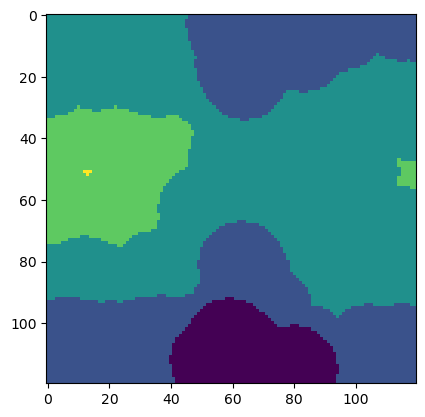

In [8]:
plt.imshow(bg)

In [6]:
# import tifffile
# outdir = '/u/home/f/f7xiesnm/project-zipursky/easifish/results/viz_sparse06_v2'
# !mkdir -p $outdir

# print(np.max(images), np.min(images))
# tifffile.imwrite(outdir+'/c0_s4.tiff', images)

# print(np.max(images_dapi), np.min(images_dapi))
# tifffile.imwrite(outdir+'/c3_s4.tiff', images_dapi)

In [7]:
pctls = [1, 10, 20, 
         30, 40, 50, 
         80, 90, 95, 
         99, 99.2, 99.4, 
         99.6, 99.8, 99.9]
vects = []
for pctl in pctls:
    vec = np.percentile(images_raw, pctl, axis=0)
    vects.append(vec)

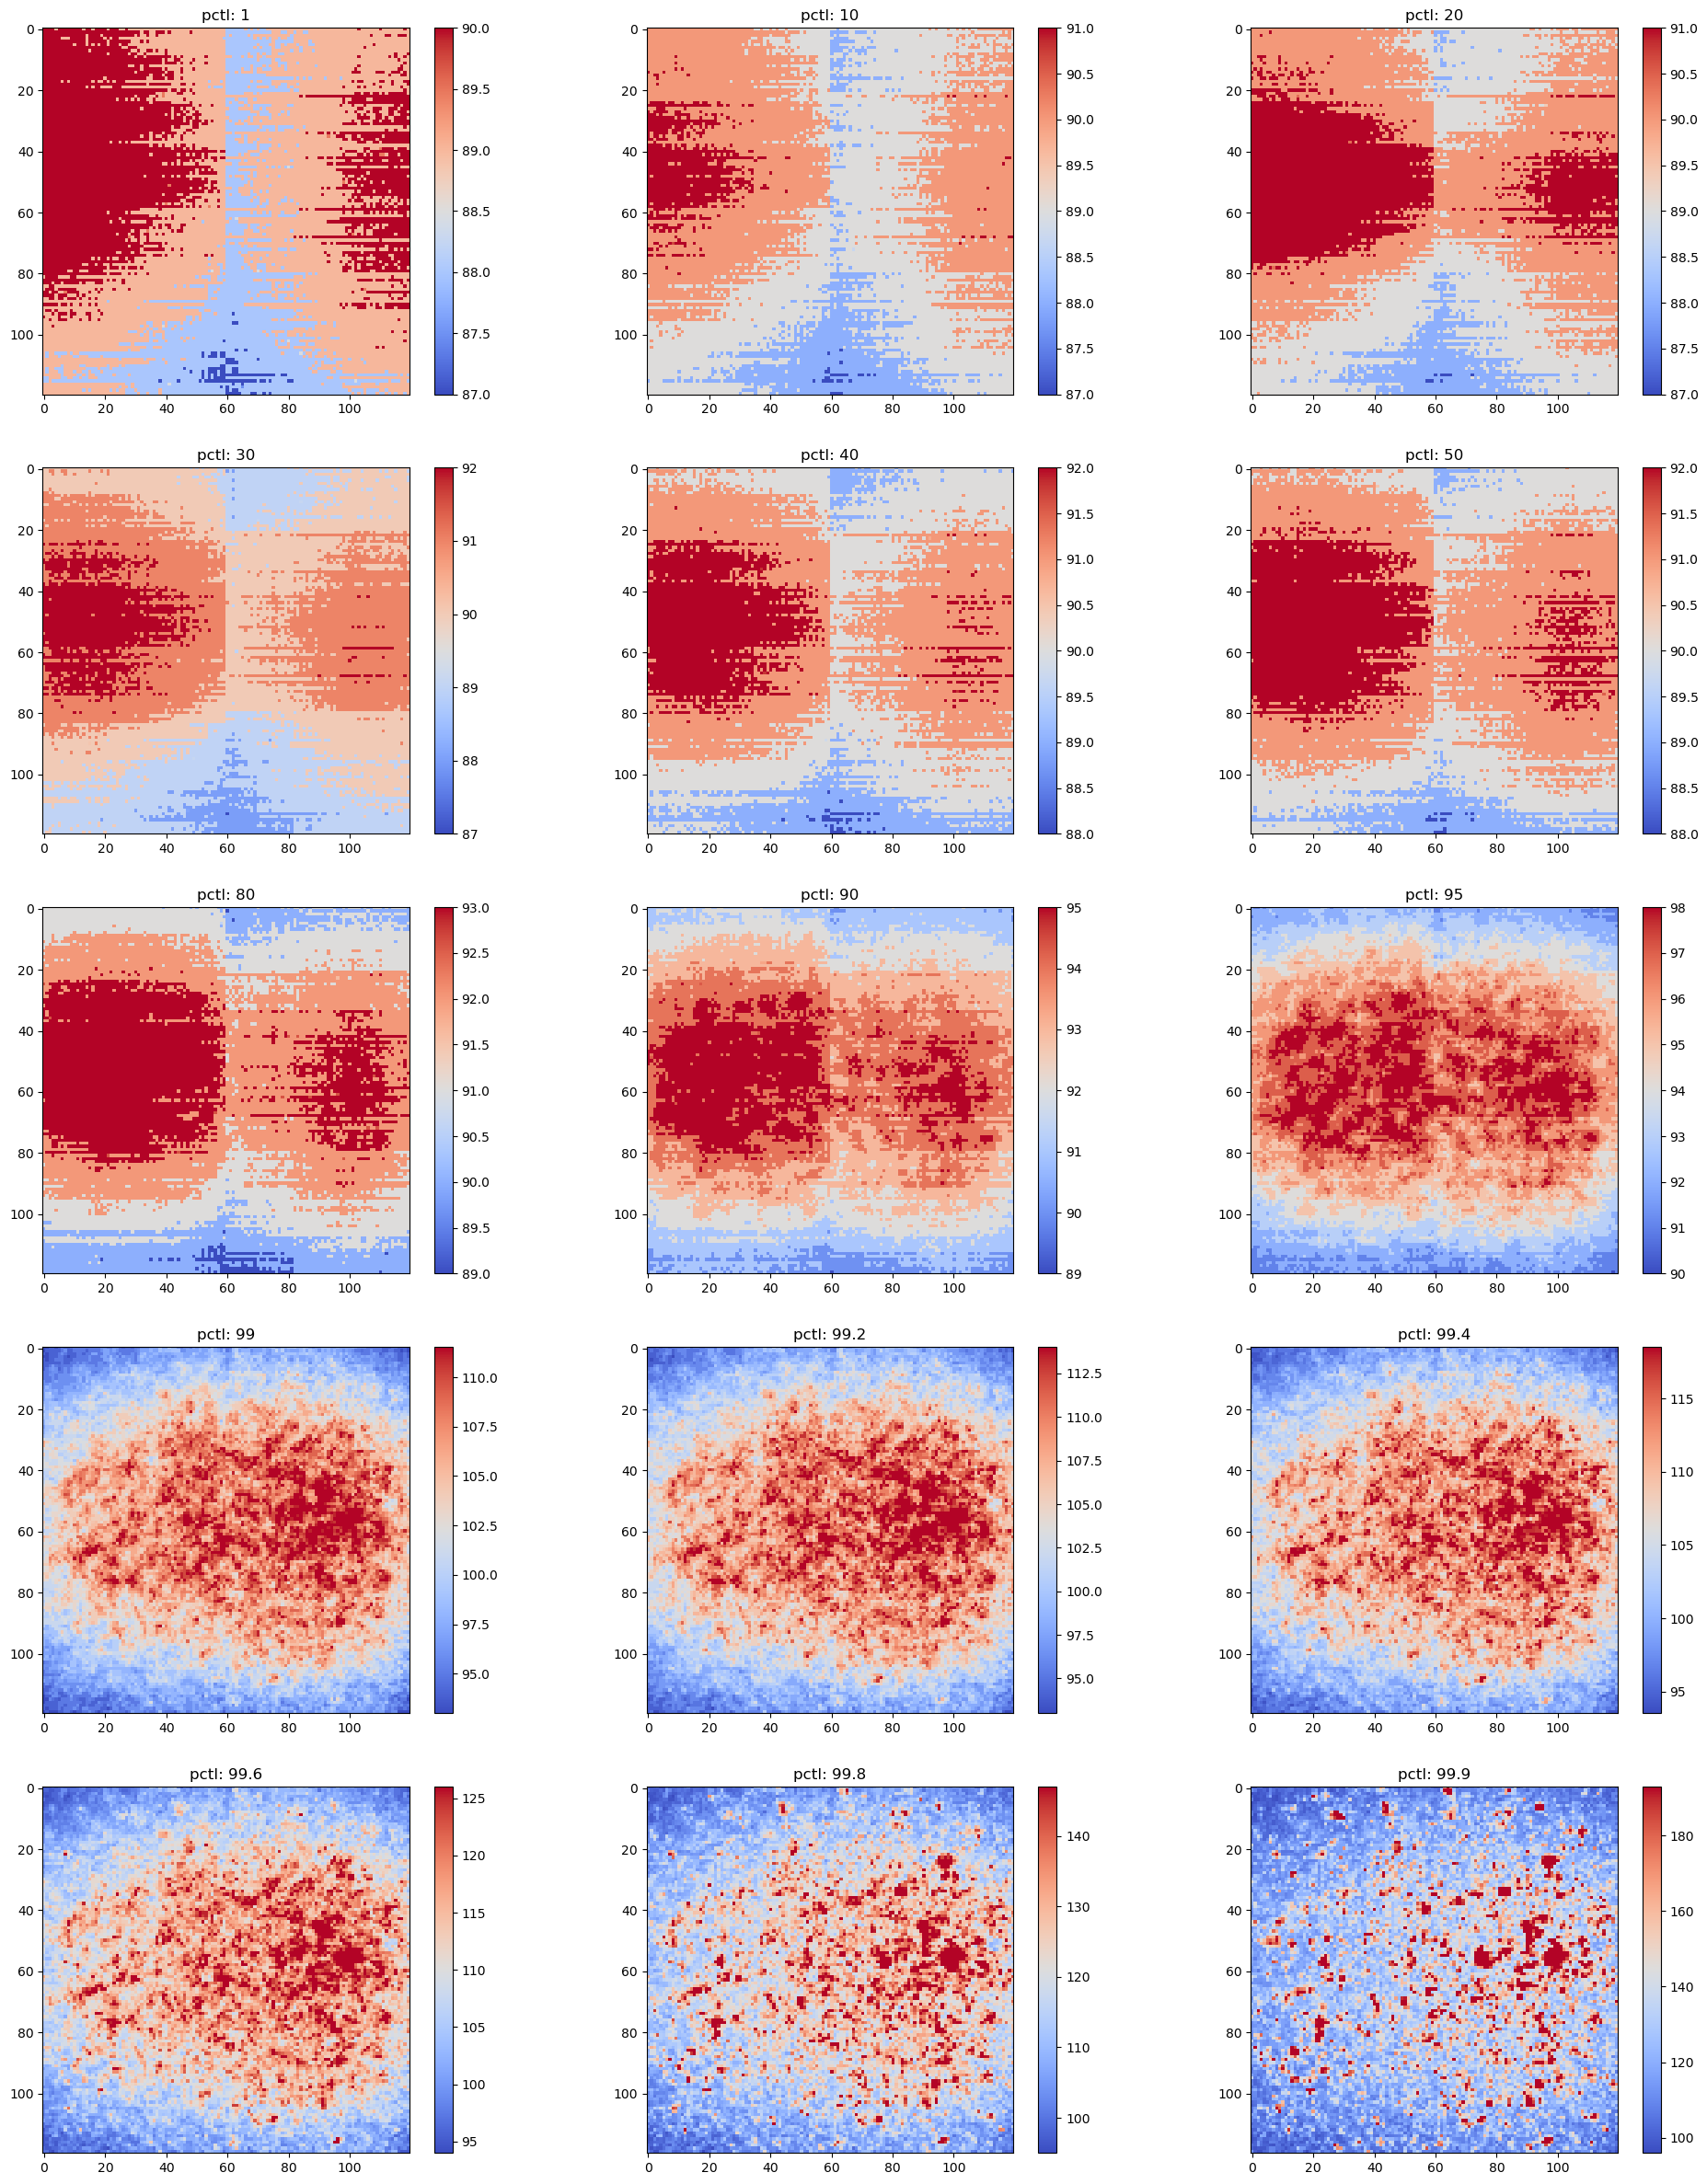

In [8]:
fig, axs = plt.subplots(5,3, figsize=(3*8,5*6))
for ax, pctl, vec in zip(axs.flat, pctls, vects): 
    vmax = np.percentile(vec, 95)
    vmin = np.percentile(vec,  5)
    g = ax.imshow(vec, cmap='coolwarm', vmax=vmax)
    ax.set_title(f'pctl: {pctl}')
    fig.colorbar(g)

plt.show()

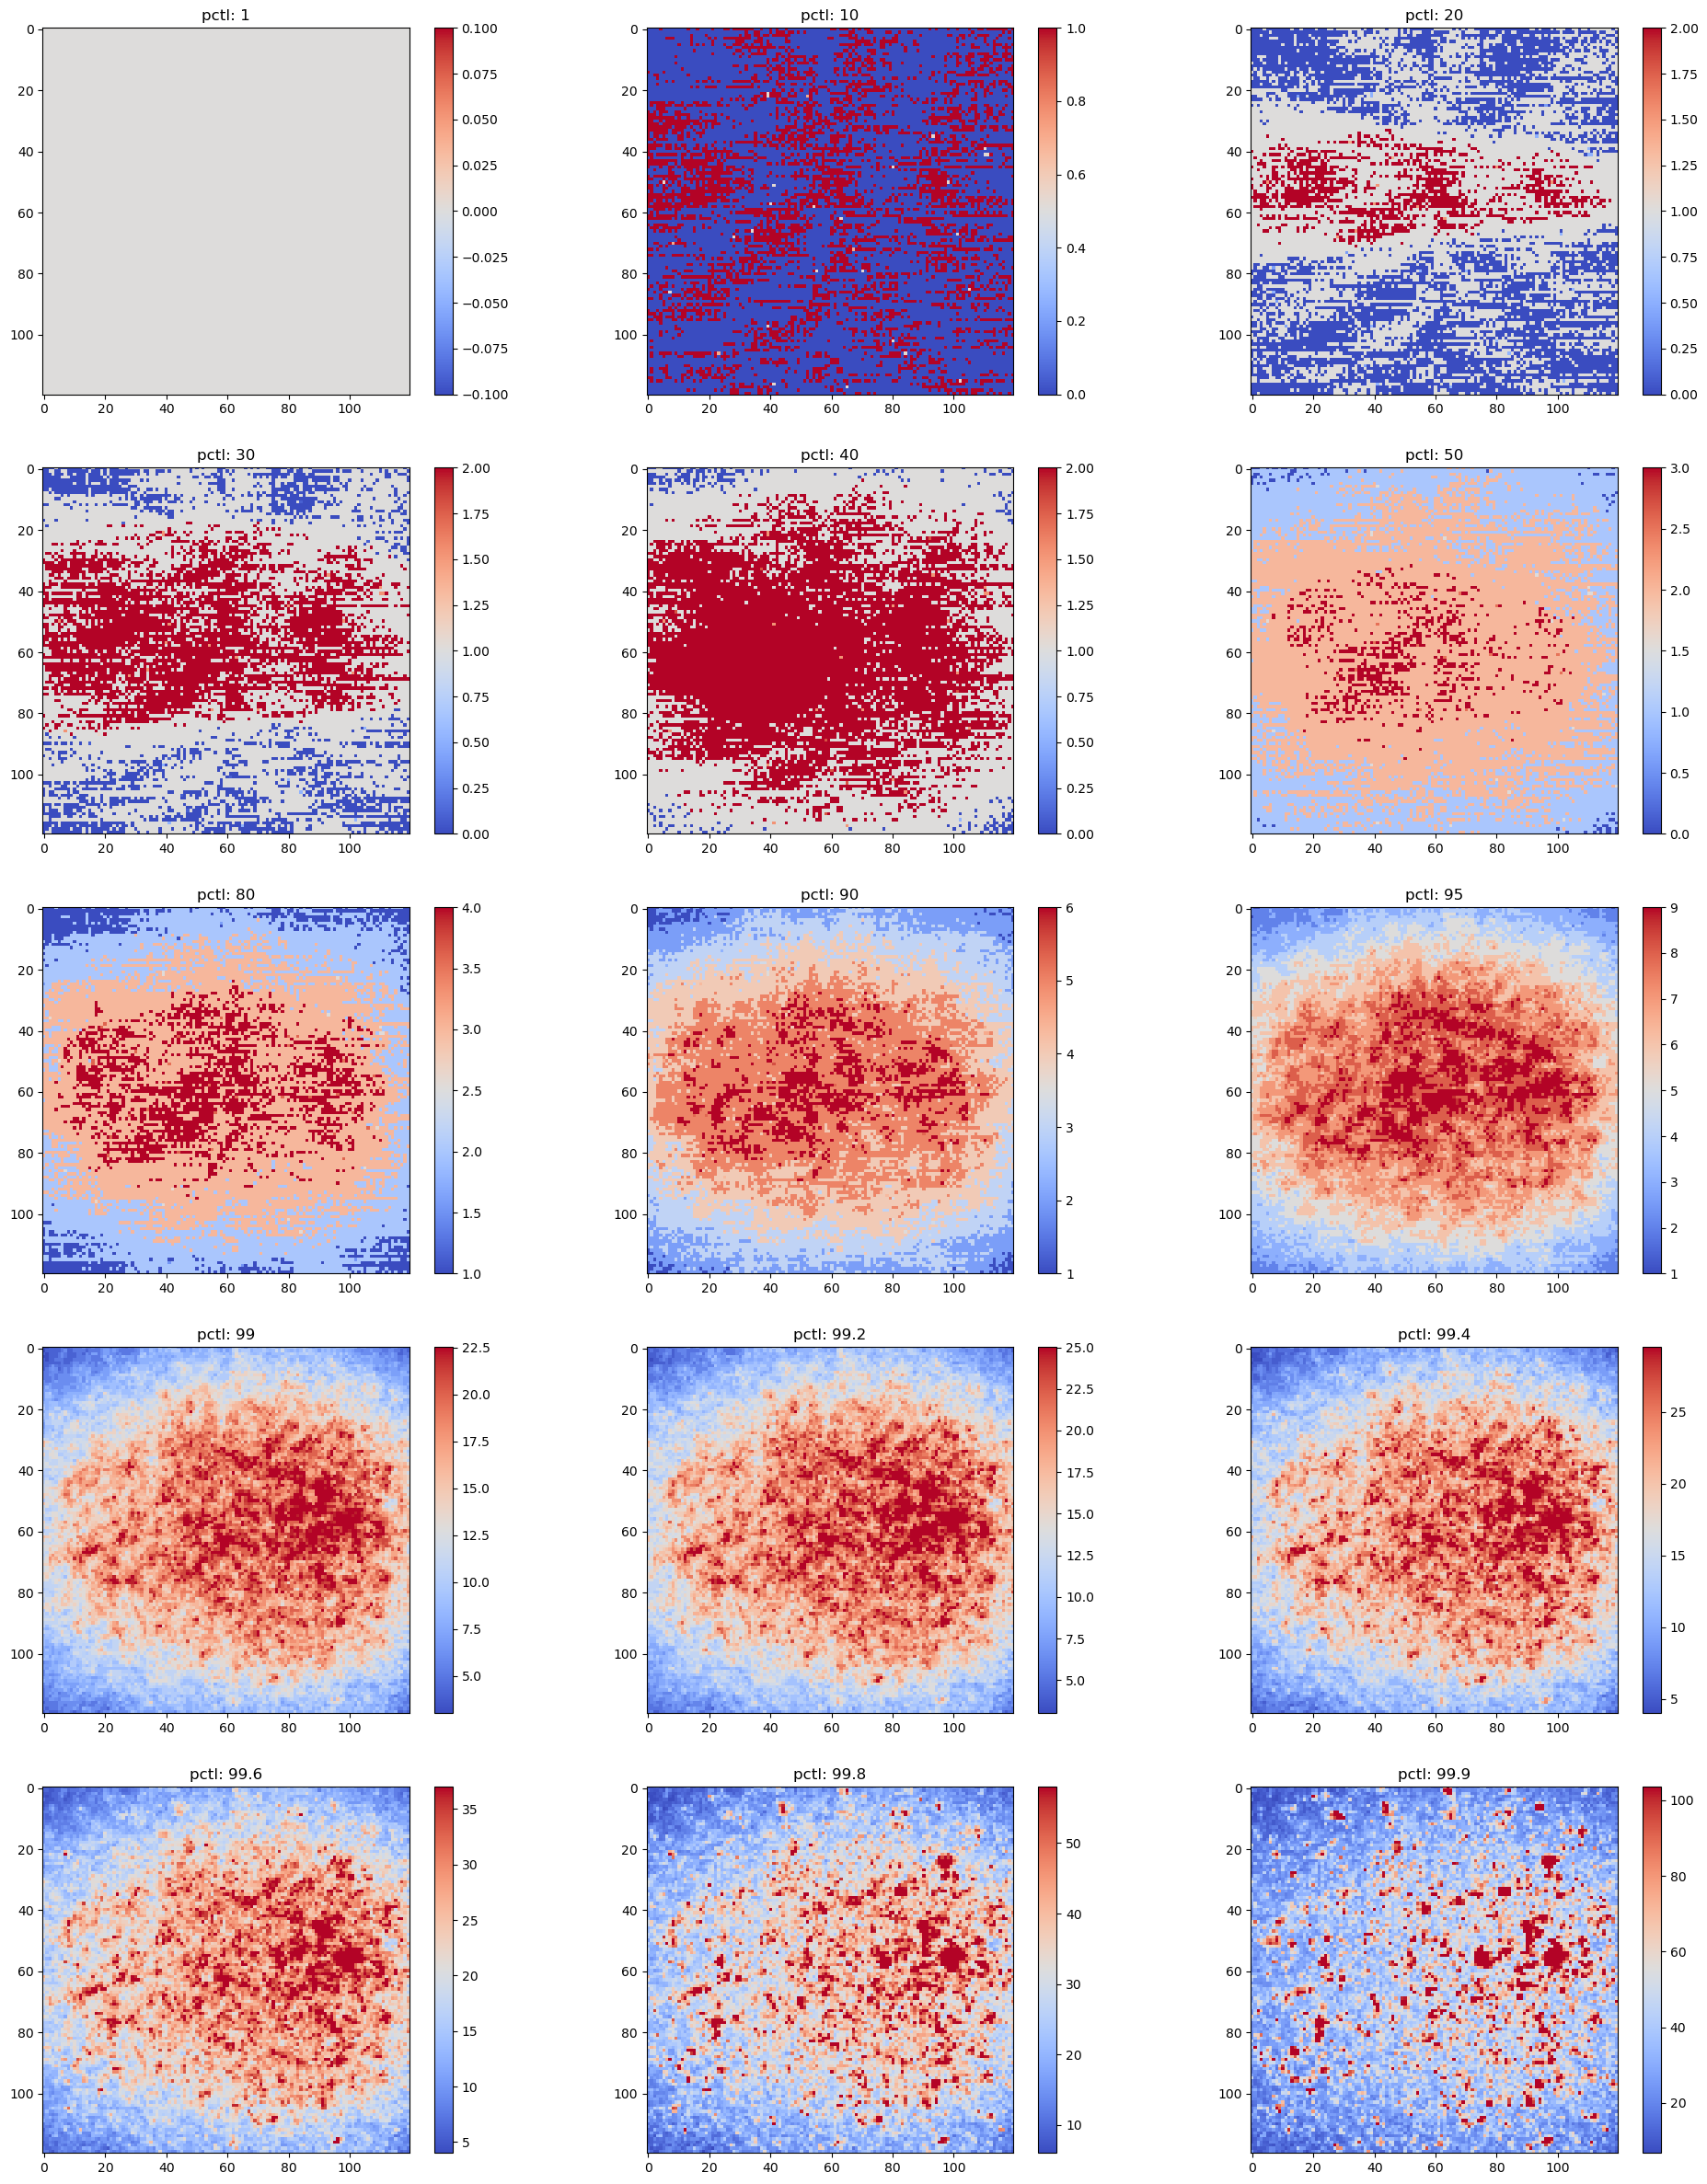

In [9]:
fig, axs = plt.subplots(5,3, figsize=(3*8,5*6))
for ax, pctl, vec in zip(axs.flat, pctls, vects): 
    vec = vec - vects[0]
    vmax = np.percentile(vec, 95)
    vmin = np.percentile(vec,  5)
    g = ax.imshow(vec, cmap='coolwarm', vmax=vmax)
    ax.set_title(f'pctl: {pctl}')
    fig.colorbar(g)
plt.show()

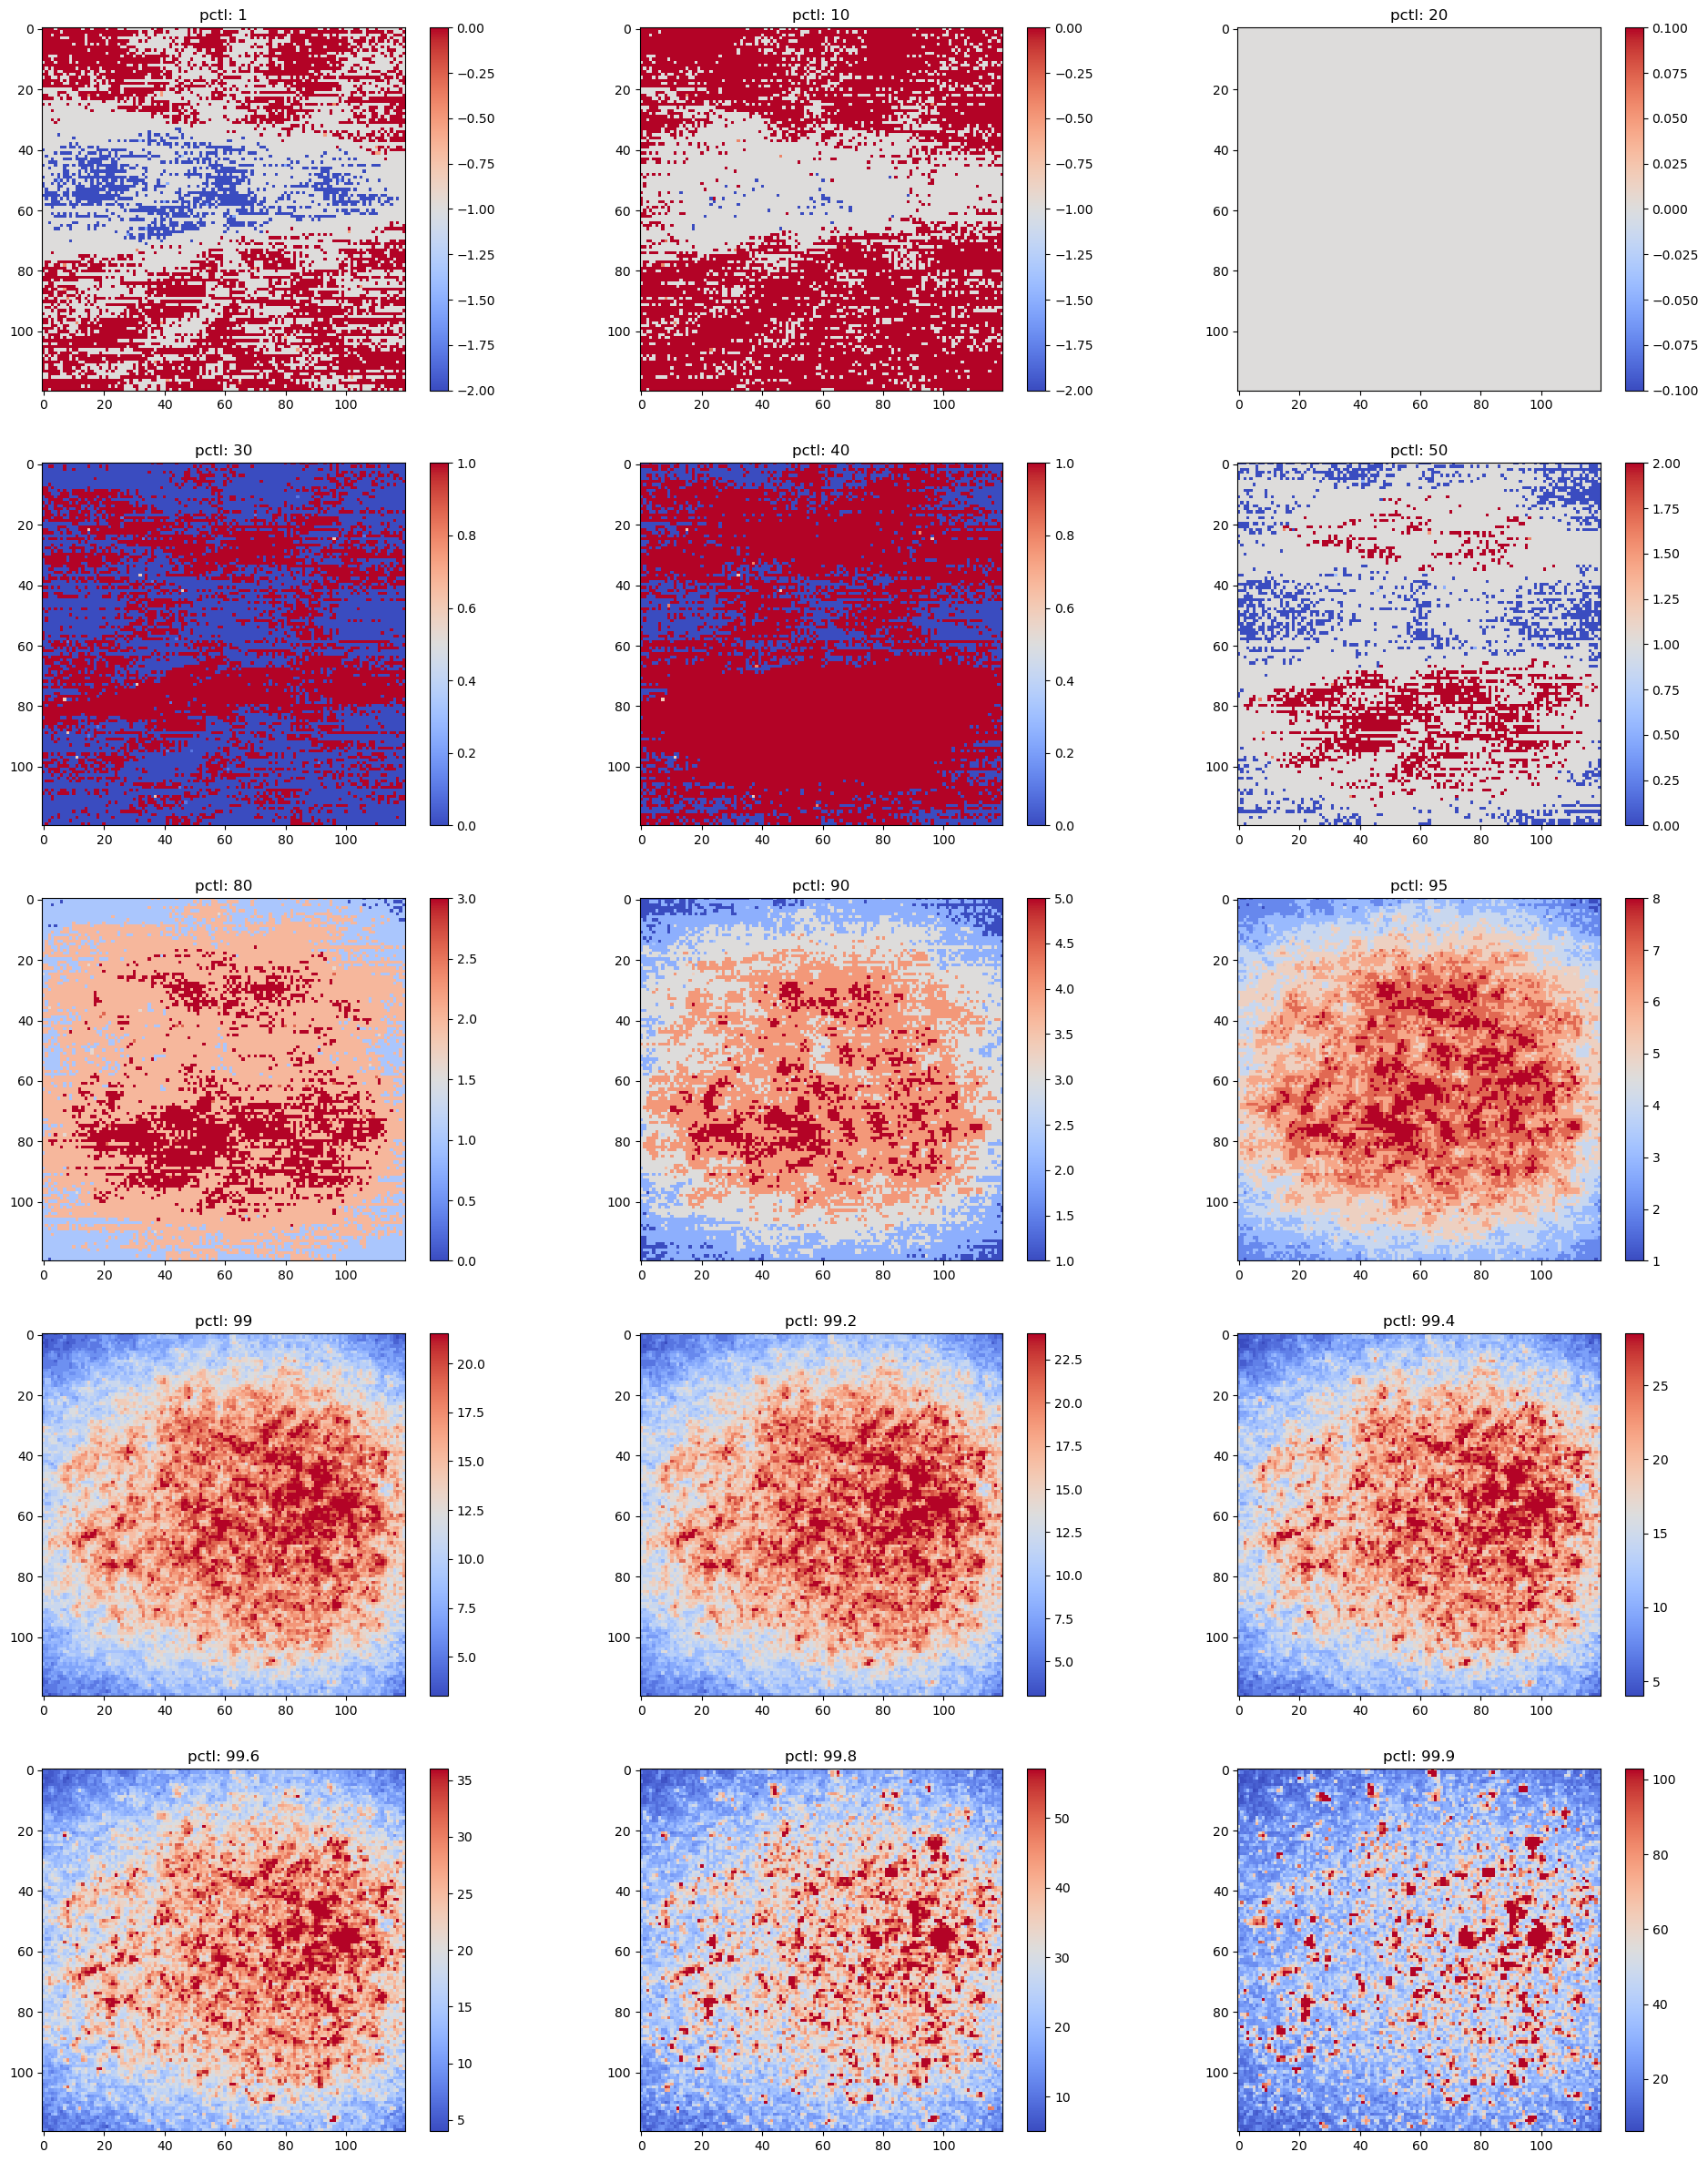

In [10]:
fig, axs = plt.subplots(5,3, figsize=(3*8,5*6))
for ax, pctl, vec in zip(axs.flat, pctls, vects): 
    vec = vec - vects[2]
    vmax = np.percentile(vec, 95)
    vmin = np.percentile(vec,  5)
    g = ax.imshow(vec, cmap='coolwarm', vmax=vmax)
    ax.set_title(f'pctl: {pctl}')
    fig.colorbar(g)
plt.show()

In [11]:
# correct it

In [12]:
# images = zarr_data[f'/setup13/timepoint0/s4'][...]
images = images_raw.copy()
dx = np.percentile(images,20, axis=0)
images = np.clip(images.astype(np.float16) - dx, 0, 1000).astype(np.uint16)

In [ ]:
%%time
np.random.seed(0)

n = 100
idx = np.random.choice(len(images), n, replace=False)
basic = BaSiC(get_darkfield=False, smoothness_flatfield=1, working_size=None , sort_intensity=True)
basic.fit(images[idx])

In [ ]:
ff  = basic.flatfield
np.min(ff), np.max(ff)

In [ ]:
df  = basic.darkfield
np.min(df), np.max(df)

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(8*2, 6))

ax = axs[0]
g = ax.imshow(df, cmap='coolwarm') #, vmin=0, vmax=2)
ax.set_title('dark-field')
plt.colorbar(g)

ax = axs[1]
g = ax.imshow(ff, cmap='coolwarm',) # vmid=1) # vmin=0, vmax=2)
ax.set_title('flat-field')
fig.colorbar(g)

plt.show()

In [ ]:
%%time
np.random.seed(0)

n = 200
idx = np.random.choice(len(images), n, replace=False)
basic = BaSiC(get_darkfield=False, smoothness_flatfield=1, working_size=None, sort_intensity=True)
basic.fit(images[idx])

In [ ]:
ff  = basic.flatfield
np.min(ff), np.max(ff)

In [ ]:
df  = basic.darkfield
np.min(df), np.max(df)

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(8*2, 6))

ax = axs[0]
g = ax.imshow(df, cmap='coolwarm') #, vmin=0, vmax=2)
ax.set_title('dark-field')
plt.colorbar(g)

ax = axs[1]
g = ax.imshow(ff, cmap='coolwarm',) # vmid=1) # vmin=0, vmax=2)
ax.set_title('flat-field')
fig.colorbar(g)

plt.show()

In [ ]:
%%time
np.random.seed(0)

n = 400
idx = np.random.choice(len(images), n, replace=False)
basic = BaSiC(get_darkfield=False, smoothness_flatfield=1, working_size=None, sort_intensity=True)
basic.fit(images[idx])

In [ ]:
ff  = basic.flatfield
np.min(ff), np.max(ff)

In [ ]:
df  = basic.darkfield
np.min(df), np.max(df)

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(8*2, 6))

ax = axs[0]
g = ax.imshow(df, cmap='coolwarm') #, vmin=0, vmax=2)
ax.set_title('dark-field')
plt.colorbar(g)

ax = axs[1]
g = ax.imshow(ff, cmap='coolwarm',) # vmid=1) # vmin=0, vmax=2)
ax.set_title('flat-field')
fig.colorbar(g)

plt.show()

In [ ]:
%%time
np.random.seed(0)

n = 800
idx = np.random.choice(len(images), n, replace=False)
basic = BaSiC(get_darkfield=False, smoothness_flatfield=1, working_size=None , sort_intensity=True)
basic.fit(images[idx])

In [ ]:
ff  = basic.flatfield
np.min(ff), np.max(ff)

In [ ]:
df  = basic.darkfield
np.min(df), np.max(df)

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(8*2, 6))

ax = axs[0]
g = ax.imshow(df, cmap='coolwarm') #, vmin=0, vmax=2)
ax.set_title('dark-field')
plt.colorbar(g)

ax = axs[1]
g = ax.imshow(ff, cmap='coolwarm',) # vmid=1) # vmin=0, vmax=2)
ax.set_title('flat-field')
fig.colorbar(g)

plt.show()

In [ ]:
%%time
np.random.seed(0)

n = 1600
idx = np.random.choice(len(images), n, replace=False)
basic = BaSiC(get_darkfield=False, smoothness_flatfield=1, working_size=None , sort_intensity=True)
basic.fit(images[idx])

In [ ]:
ff  = basic.flatfield
np.min(ff), np.max(ff)

In [ ]:
df  = basic.darkfield
np.min(df), np.max(df)

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(8*2, 6))

ax = axs[0]
g = ax.imshow(df, cmap='coolwarm') #, vmin=0, vmax=2)
ax.set_title('dark-field')
plt.colorbar(g)

ax = axs[1]
g = ax.imshow(ff, cmap='coolwarm',) # vmid=1) # vmin=0, vmax=2)
ax.set_title('flat-field')
fig.colorbar(g)

plt.show()

In [ ]:
%%time
np.random.seed(0)

# n = 1600
# idx = np.random.choice(len(images), n, replace=False)
basic = BaSiC(get_darkfield=False, smoothness_flatfield=1, working_size=None, sort_intensity=True)
basic.fit(images) # [idx])

In [ ]:
ff  = basic.flatfield
np.min(ff), np.max(ff)

In [ ]:
df  = basic.darkfield
np.min(df), np.max(df)

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(8*2, 6))

ax = axs[0]
g = ax.imshow(dx, cmap='coolwarm') #, vmin=0, vmax=2)
ax.set_title('dark-field')
plt.colorbar(g)

ax = axs[1]
g = ax.imshow(ff, cmap='coolwarm',) # vmid=1) # vmin=0, vmax=2)
ax.set_title('flat-field')
fig.colorbar(g)

plt.show()

In [ ]:
# import tifffile
# outdir = '/u/home/f/f7xiesnm/project-zipursky/easifish/results/sparse06_r1c0_flatfield'
# !mkdir -p $outdir

# tifffile.imwrite(outdir+'/darkfield.tiff', dx)
# tifffile.imwrite(outdir+'/flatfield.tiff', ff)

In [47]:
# !ls $outdir
# dx = tifffile.imread(outdir+'/darkfield.tiff')
# ff = tifffile.imread(outdir+'/flatfield.tiff')
# dx, ff

darkfield.tiff	flatfield.tiff


(array([[90., 90., 90., ..., 89., 90., 89.],
        [90., 90., 90., ..., 89., 89., 89.],
        [90., 90., 90., ..., 90., 90., 89.],
        ...,
        [89., 89., 89., ..., 89., 89., 89.],
        [89., 89., 89., ..., 89., 89., 89.],
        [89., 89., 89., ..., 89., 88., 89.]]),
 array([[0.5908916 , 0.5906941 , 0.59030217, ..., 0.5903022 , 0.5906941 ,
         0.5908916 ],
        [0.5893872 , 0.5892838 , 0.5890773 , ..., 0.58907723, 0.5892838 ,
         0.58938724],
        [0.5880637 , 0.58802885, 0.58795923, ..., 0.58795923, 0.58802885,
         0.58806366],
        ...,
        [0.59204274, 0.59175044, 0.59117776, ..., 0.5911777 , 0.59175044,
         0.5920428 ],
        [0.59385425, 0.5935996 , 0.5931013 , ..., 0.5931014 , 0.5935996 ,
         0.59385425],
        [0.5944652 , 0.59429044, 0.5939478 , ..., 0.5939478 , 0.5942905 ,
         0.59446526]], dtype=float32))

# save ff and dx (1 percentile)
- save this and use it later!!!

In [37]:
ff.shape

(120, 120)

In [38]:
dx.shape

(120, 120)

In [15]:
images_s1  = zarr_data[f'/setup13/timepoint0/s1'][...]
attributes = zarr_data[f'/setup13/timepoint0/s1'].attrs.asdict()
attributes['pixelResolution'] = [0.23, 0.23, 0.42] # useful later
attributes

{'downsamplingFactors': [2, 2, 1], 'pixelResolution': [0.23, 0.23, 0.42]}

In [26]:
np.min(ff_s1)

0.5087739

In [28]:
ff_s1 = zoom(basic.flatfield, 8)
dx_s1 = zoom(dx, 8)
# images_transformed    = transform(images   , basic.flatfield).astype(np.uint16)
images_transformed_s1 = transform(images_s1.astype(np.float16), ff_s1, d=dx_s1).astype(np.uint16)

In [29]:
# a0 = cnst + images_s1.astype(np.uint16)
# a  = cnst + images_transformed_s1.astype(np.uint16)
a  = images_transformed_s1.astype(np.uint16)
# a

array([[[ 5,  7,  0, ...,  0,  5, 15],
        [ 3,  7,  0, ...,  0, 15,  3],
        [ 1,  0,  5, ...,  7,  4,  2],
        ...,
        [ 0,  1, 10, ...,  0,  3,  5],
        [ 0,  0,  5, ...,  0,  7,  0],
        [ 0,  1,  5, ...,  5,  1,  0]],

       [[ 3,  0,  3, ..., 13,  7,  5],
        [ 0,  3,  1, ...,  0,  7,  1],
        [ 5, 15,  9, ...,  0,  9, 11],
        ...,
        [ 1,  7,  9, ...,  3,  0,  3],
        [ 5,  7,  1, ...,  0,  0,  0],
        [ 0,  0,  5, ...,  0,  0,  0]],

       [[ 1,  7,  7, ...,  0,  9, 15],
        [ 1,  1,  3, ...,  1,  9,  3],
        [ 3,  0,  1, ..., 11,  4, 17],
        ...,
        [ 5,  3,  0, ...,  3,  3, 13],
        [ 3,  5,  1, ...,  0,  0,  5],
        [ 0,  3,  3, ...,  0,  0,  0]],

       ...,

       [[ 1,  3,  3, ...,  0,  0,  9],
        [ 0,  9,  0, ...,  0,  5,  3],
        [ 1,  0,  3, ...,  2,  7,  4],
        ...,
        [ 0,  3,  0, ...,  0,  0,  0],
        [10,  0,  5, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0

In [30]:
n5_root = zarr.open_group(store=zarr.N5Store(outpath), mode='w')

In [31]:
dataset = n5_root.require_dataset(
    'c0/s1',
    shape=a.shape,
    chunks=(64, 128, 128),
    dtype=a.dtype,
    compressor=GZip(level=1),
    data=a)
# set additional attributes
dataset.attrs.update(**attributes)

In [32]:
n5_root['c0/s1']

<zarr.core.Array '/c0/s1' (2837, 960, 960) uint16>

In [33]:
!ls $outpath
!cat $outpath/attributes.json
!cat $outpath/c0/s1/attributes.json

attributes.json  c0
{
    "n5": "2.0.0"
}{
    "blockSize": [
        128,
        128,
        64
    ],
    "compression": {
        "level": 1,
        "type": "gzip",
        "useZlib": false
    },
    "dataType": "uint16",
    "dimensions": [
        960,
        960,
        2837
    ],
    "downsamplingFactors": [
        2,
        2,
        1
    ],
    "pixelResolution": [
        0.23,
        0.23,
        0.42
    ]
}

In [44]:
img1 = n5_root['c0/s1'][...]
img2 = n5_root['c00/s1'][...]

NameError: name 'n5_root' is not defined

In [45]:
img1.shape, img2.shape

NameError: name 'img1' is not defined

In [18]:
import tifffile

outdir = '/u/home/f/f7xiesnm/project-zipursky/easifish/results/viz_sparse06_v2'
!mkdir -p $outdir

print(np.max(img1), np.min(img1))
tifffile.imwrite(outdir+'/c0_s1.tiff', img1)

outdir = '/u/home/f/f7xiesnm/project-zipursky/easifish/results/viz_sparse06_v2'
print(np.max(img2), np.min(img2))
tifffile.imwrite(outdir+'/c00_s1.tiff', img2)

65487 25
2546 90


In [38]:
# get adata attributes correct

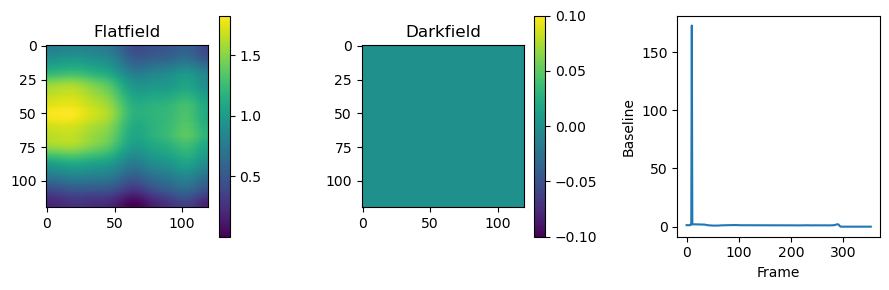

In [39]:
fig, axes = plt.subplots(1, 3, figsize=(9, 3))
im = axes[0].imshow(basic.flatfield)
fig.colorbar(im, ax=axes[0])
axes[0].set_title("Flatfield")
im = axes[1].imshow(basic.darkfield)
fig.colorbar(im, ax=axes[1])
axes[1].set_title("Darkfield")
axes[2].plot(basic.baseline)
axes[2].set_xlabel("Frame")
axes[2].set_ylabel("Baseline")
fig.tight_layout()

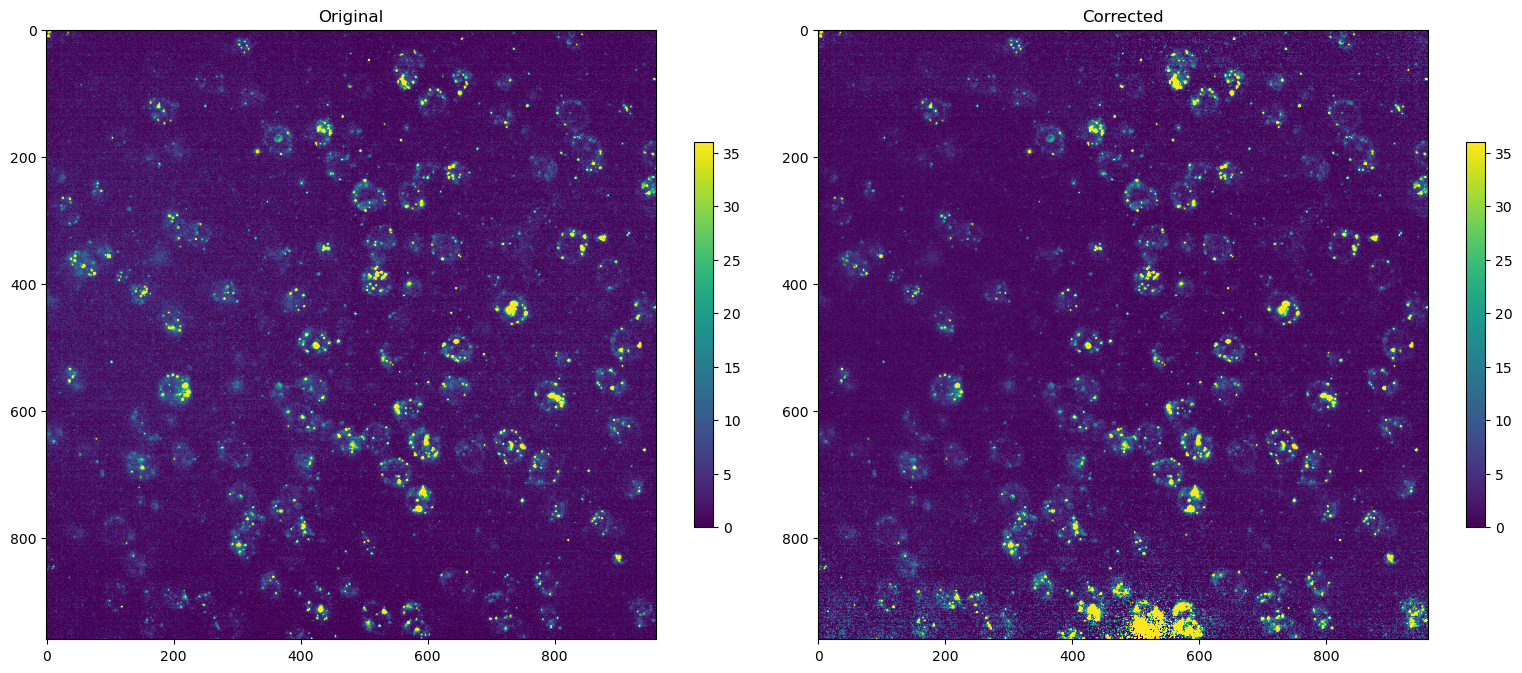

In [40]:
i = 100

vmin = np.percentile(images_transformed_s1[i], 5)
vmax = np.percentile(images_transformed_s1[i], 99)

fig, axes = plt.subplots(1, 2, figsize=(16,8))
im = axes[0].imshow(images_s1[i], vmin=vmin, vmax=vmax)
fig.colorbar(im, ax=axes[0], shrink=0.5)
axes[0].set_title("Original")
im = axes[1].imshow(images_transformed_s1[i], vmin=vmin, vmax=vmax)
fig.colorbar(im, ax=axes[1], shrink=0.5)
axes[1].set_title("Corrected")
fig.tight_layout()

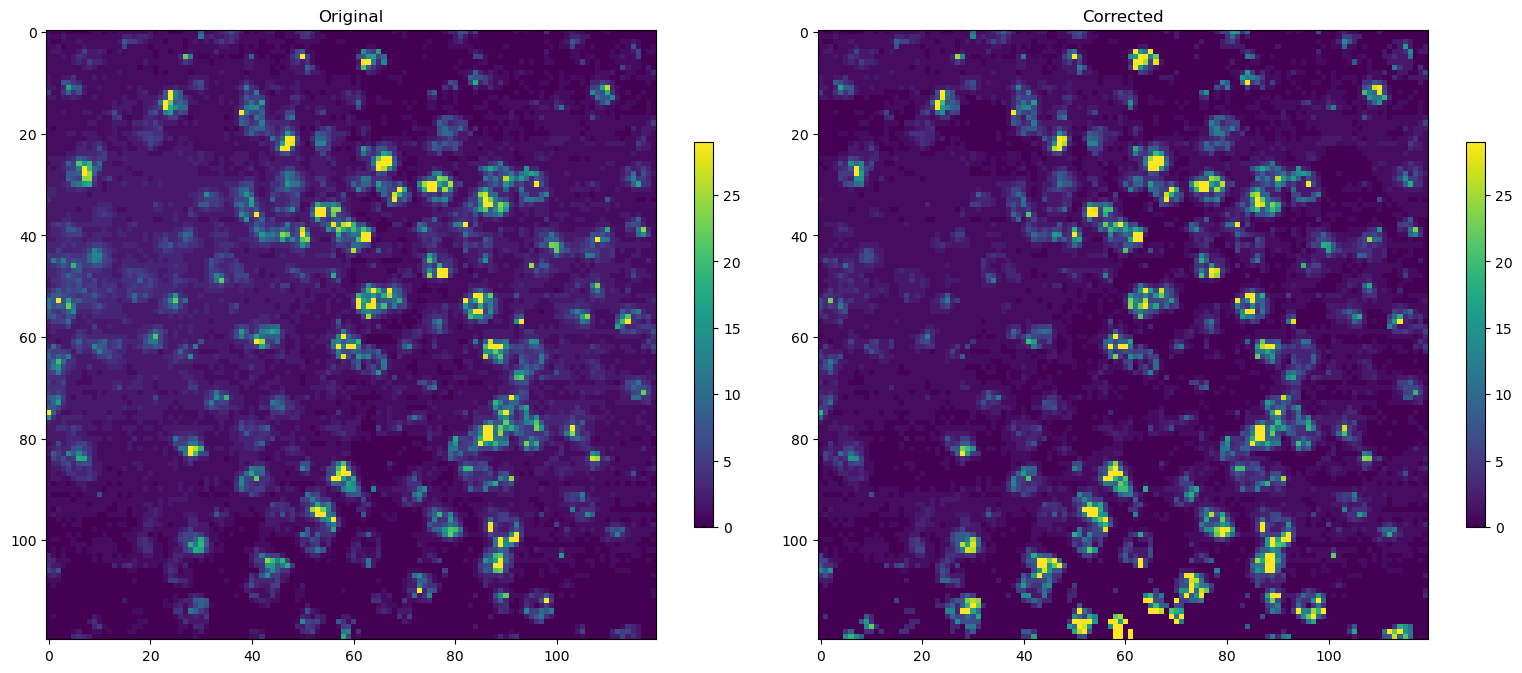

In [41]:
i = 100

vmin = np.percentile(images_transformed[i], 5)
vmax = np.percentile(images_transformed[i], 99)

fig, axes = plt.subplots(1, 2, figsize=(16,8))
im = axes[0].imshow(images[i], vmin=vmin, vmax=vmax)
fig.colorbar(im, ax=axes[0], shrink=0.5)
axes[0].set_title("Original")
im = axes[1].imshow(images_transformed[i], vmin=vmin, vmax=vmax)
fig.colorbar(im, ax=axes[1], shrink=0.5)
axes[1].set_title("Corrected")
fig.tight_layout()

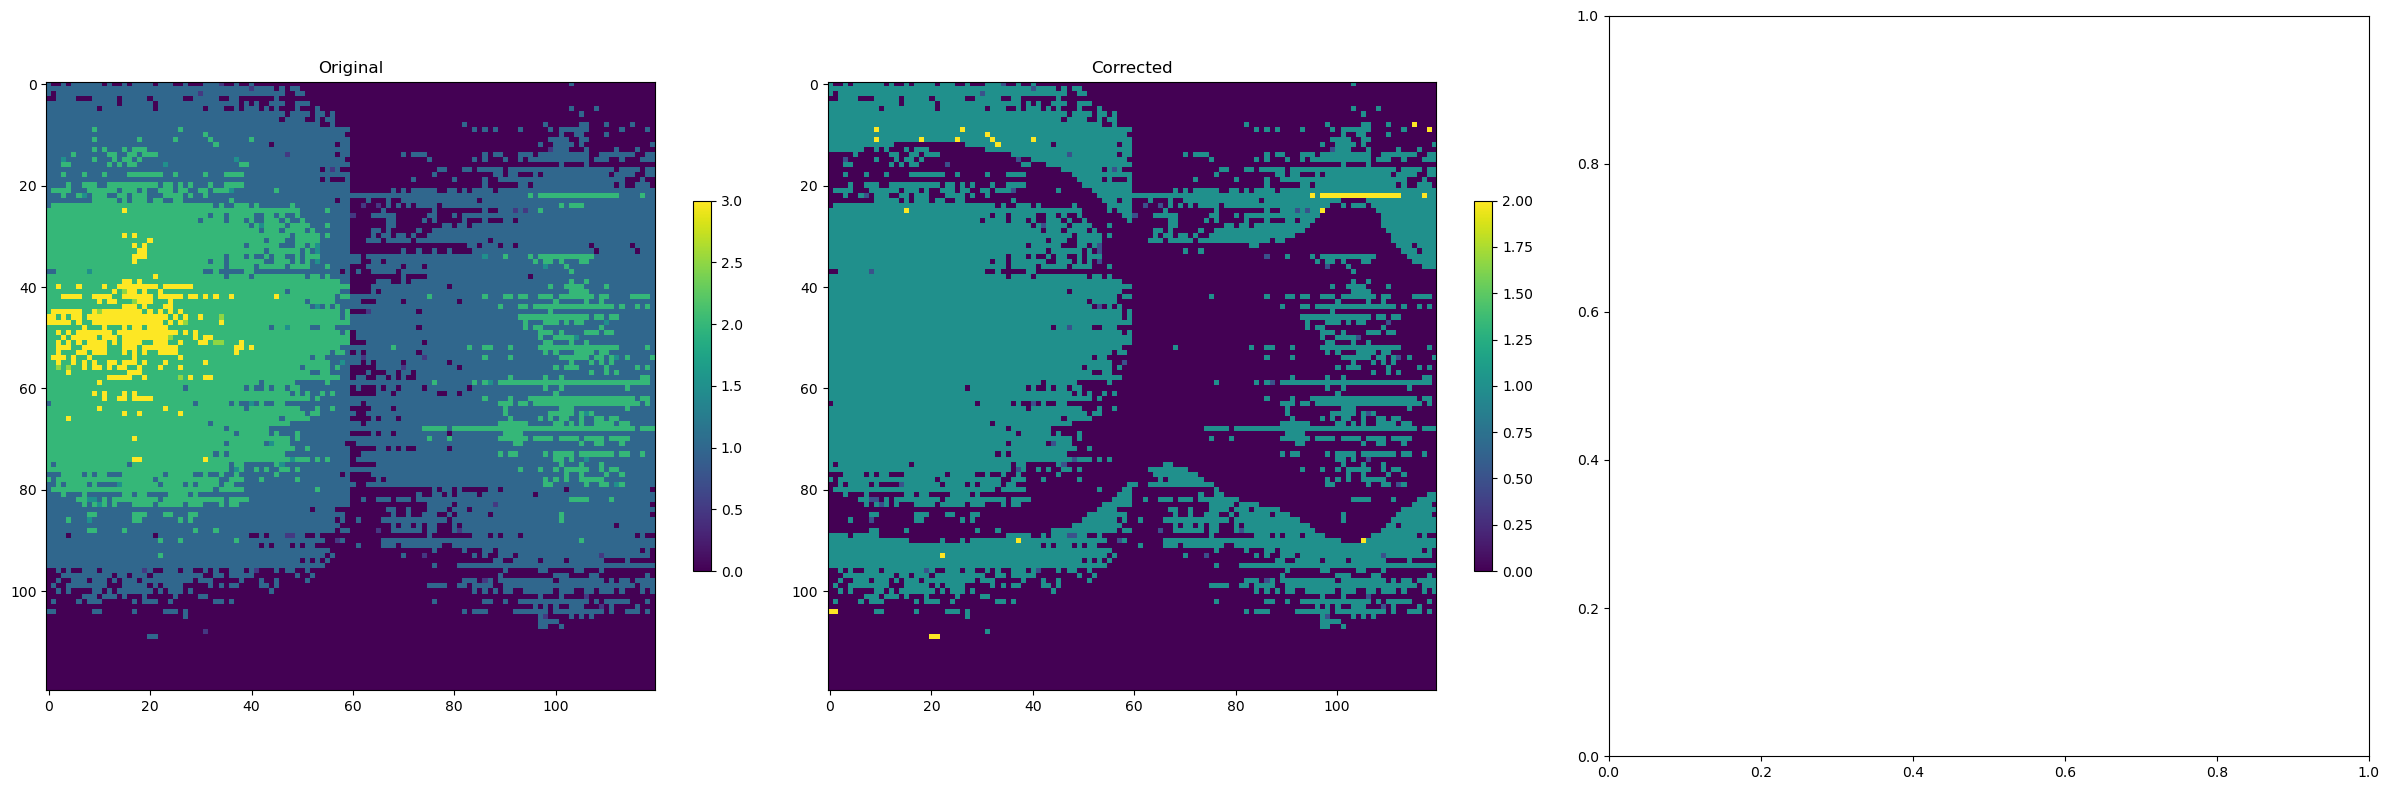

In [42]:
i = 50

vmin = np.percentile(images_transformed, 5)
vmax = np.percentile(images_transformed, 99)

fig, axes = plt.subplots(1, 3, figsize=(8*3,8))
im = axes[0].imshow(np.median(images, axis=0)) #, vmin=90, vmax=94)#, vmin=vmin, vmax=vmax)
fig.colorbar(im, ax=axes[0], shrink=0.5)
axes[0].set_title("Original")
im = axes[1].imshow(np.median(images_transformed, axis=0)) # , vmin=90, vmax=94) #, vmin=vmin, vmax=vmax)
fig.colorbar(im, ax=axes[1], shrink=0.5)
axes[1].set_title("Corrected")

# im = axes[2].imshow(np.median(images_transformed-images, axis=0)) # -np.max(images, axis=0))
# fig.colorbar(im, ax=axes[2], shrink=0.5)
# axes[2].set_title("Diff")
fig.tight_layout()

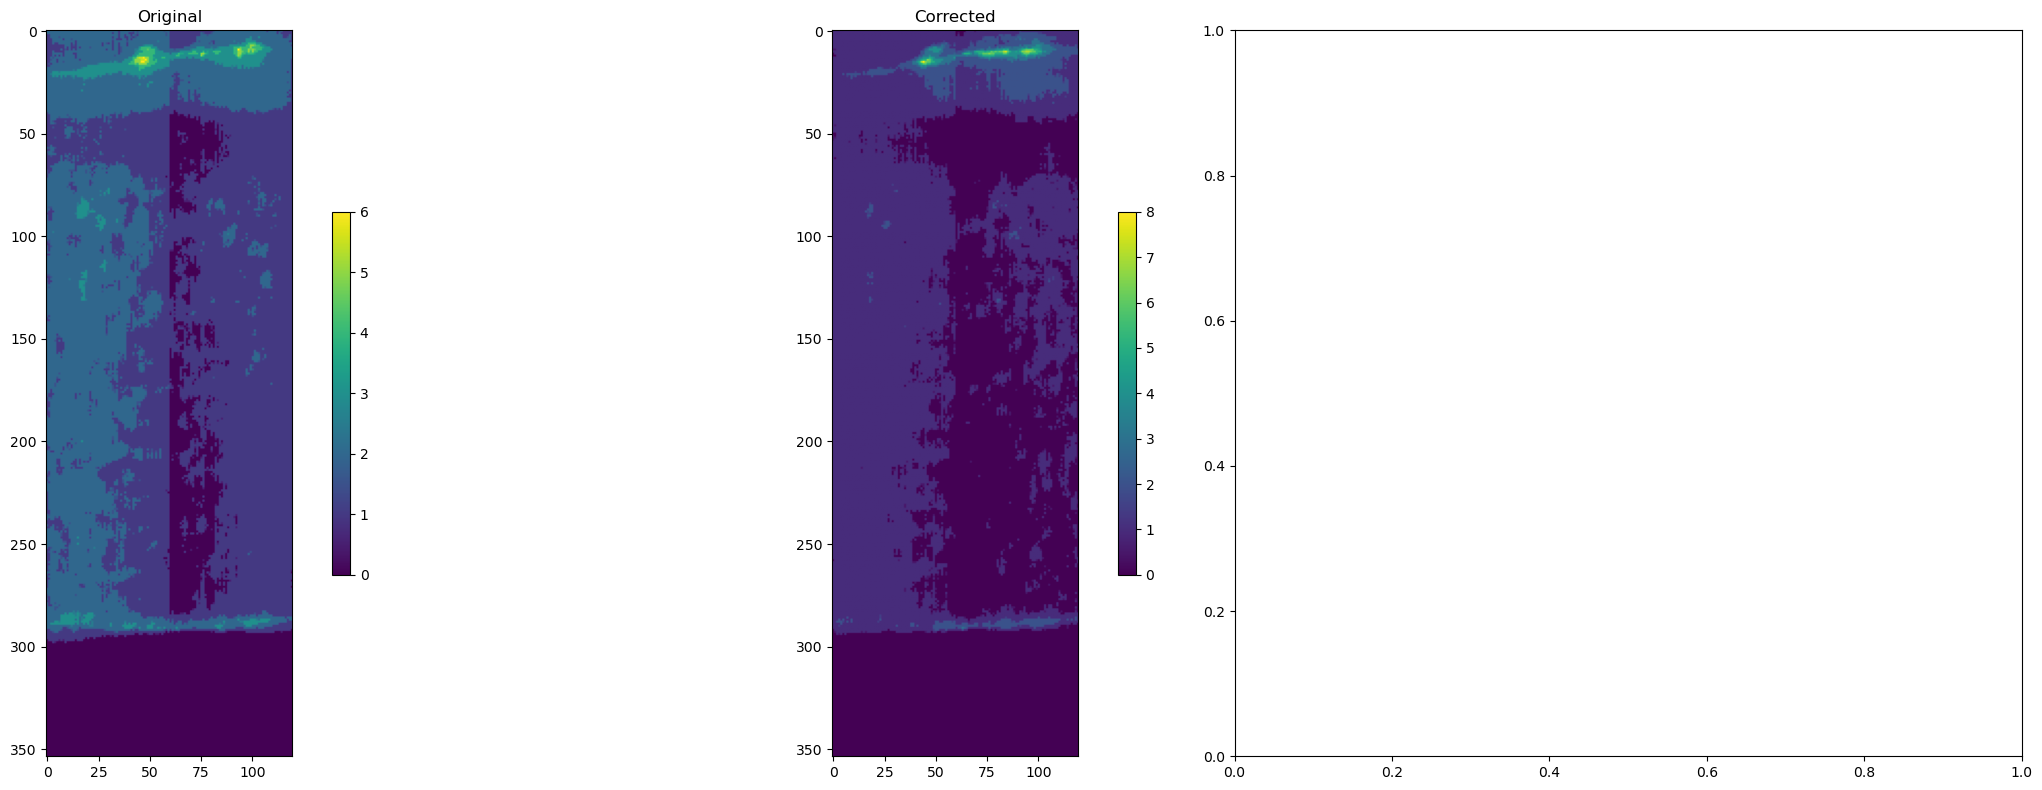

In [43]:

vmin = np.percentile(images_transformed, 5)
vmax = np.percentile(images_transformed, 99)

fig, axes = plt.subplots(1, 3, figsize=(8*3,8))
im = axes[0].imshow(np.median(images, axis=1)) #, vmin=90, vmax=95)#, vmin=vmin, vmax=vmax)
fig.colorbar(im, ax=axes[0], shrink=0.5)
axes[0].set_title("Original")
im = axes[1].imshow(np.median(images_transformed, axis=1)) # , vmin=90, vmax=95) #, vmin=vmin, vmax=vmax)
fig.colorbar(im, ax=axes[1], shrink=0.5)
axes[1].set_title("Corrected")

# im = axes[2].imshow(np.median(images_transformed-images, axis=1)) # -np.max(images, axis=0))
# fig.colorbar(im, ax=axes[2], shrink=0.5)
# axes[2].set_title("Diff")
fig.tight_layout()

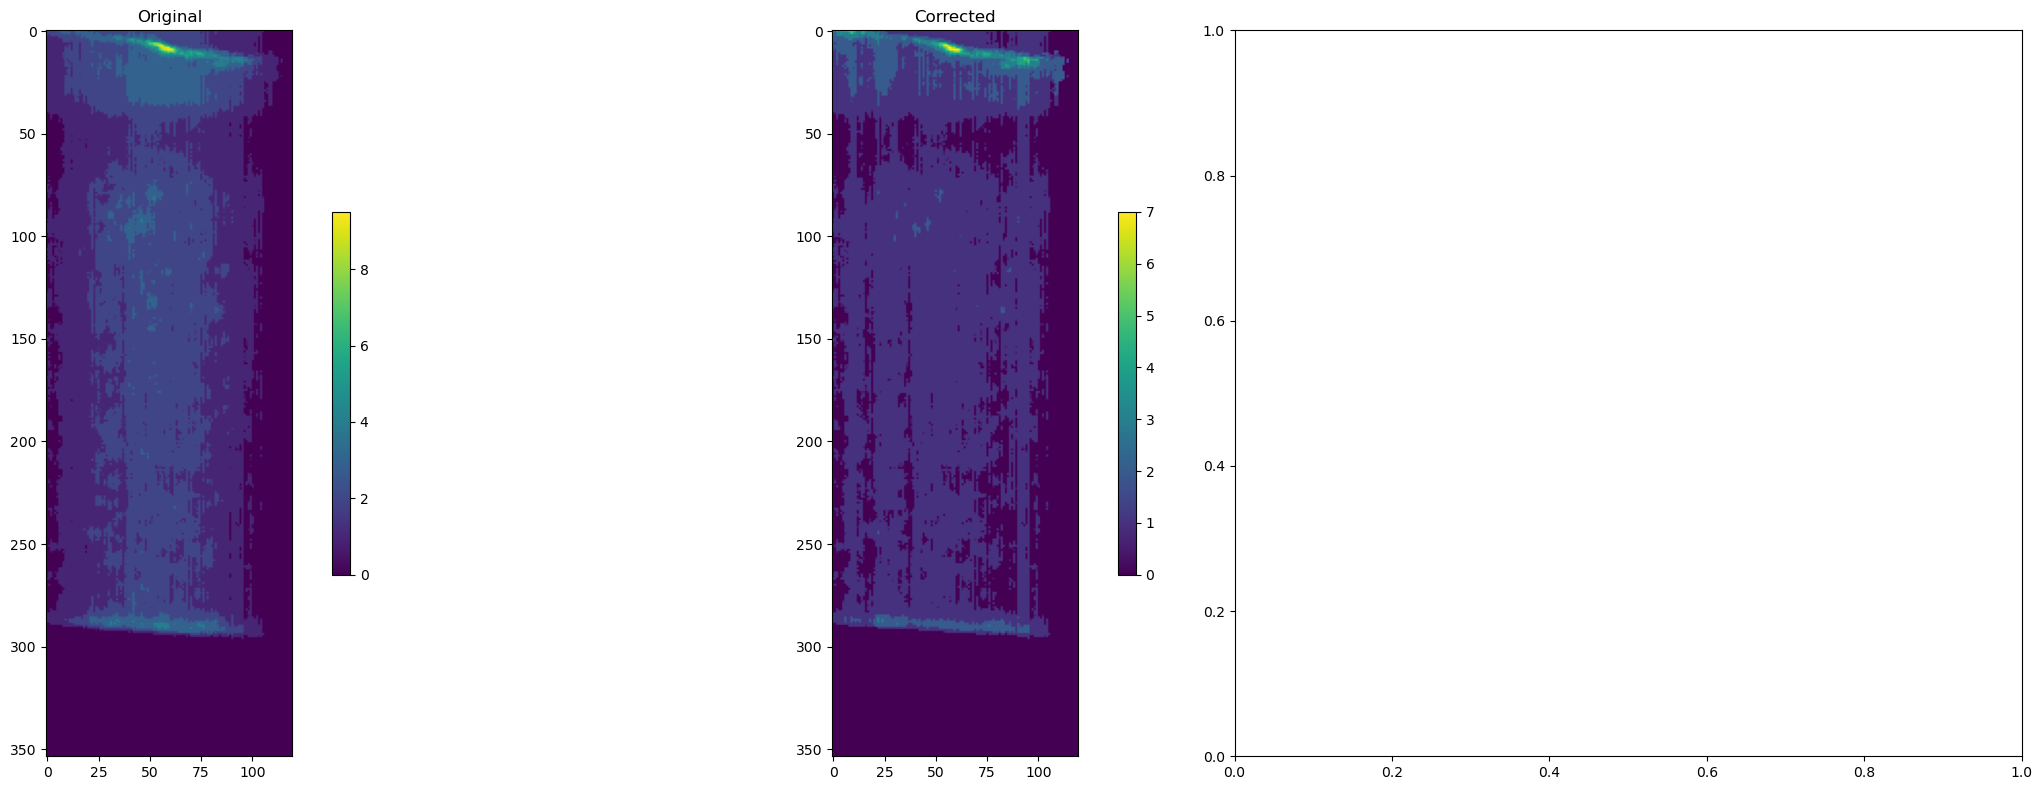

In [44]:
fig, axes = plt.subplots(1, 3, figsize=(8*3,8))
im = axes[0].imshow(np.median(images, axis=2)) #, vmin=90, vmax=95)#, vmin=vmin, vmax=vmax)
fig.colorbar(im, ax=axes[0], shrink=0.5)
axes[0].set_title("Original")
im = axes[1].imshow(np.median(images_transformed, axis=2)) # , vmin=90, vmax=95) #, vmin=vmin, vmax=vmax)
fig.colorbar(im, ax=axes[1], shrink=0.5)
axes[1].set_title("Corrected")

# im = axes[2].imshow(np.median(images_transformed-images, axis=1)) # -np.max(images, axis=0))
# fig.colorbar(im, ax=axes[2], shrink=0.5)
# axes[2].set_title("Diff")
fig.tight_layout()

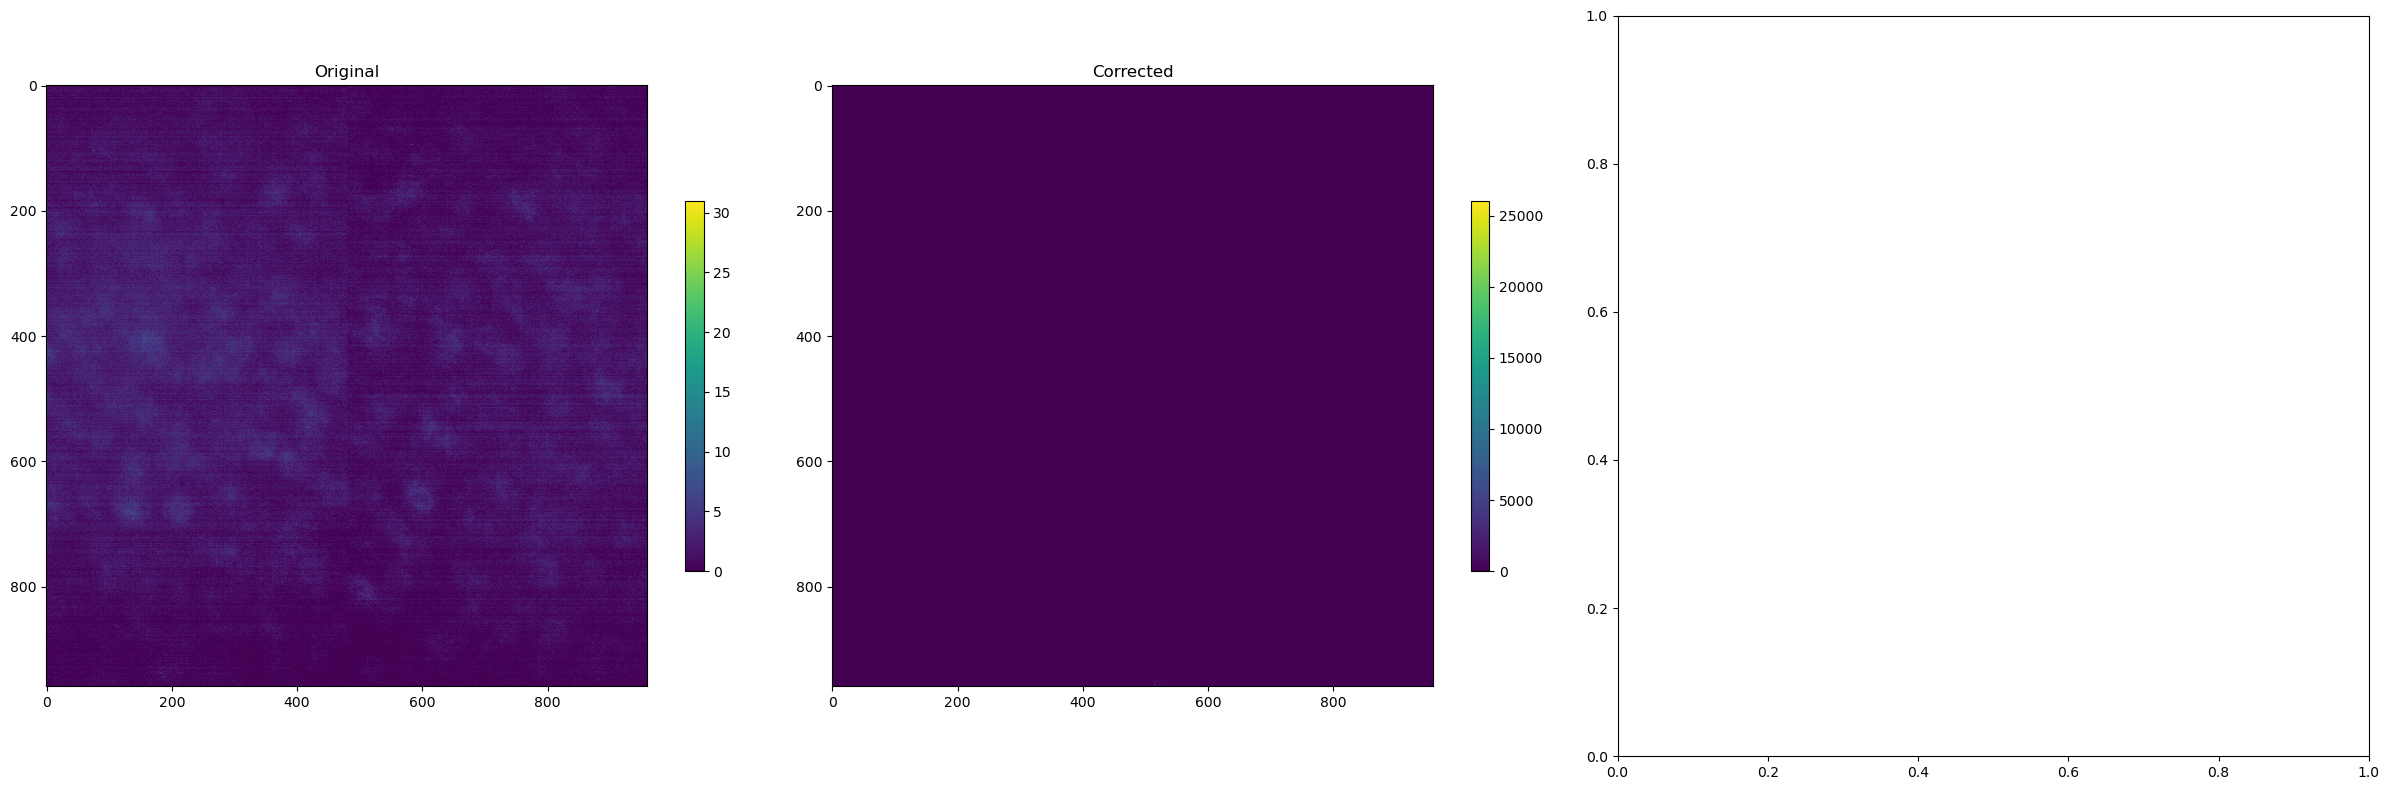

In [45]:
i = 50

vmin = np.percentile(images_transformed_s1, 5)
vmax = np.percentile(images_transformed_s1, 99)

fig, axes = plt.subplots(1, 3, figsize=(8*3,8))
im = axes[0].imshow(np.median(images_s1, axis=0)) #, vmin=90, vmax=94)#, vmin=vmin, vmax=vmax)
fig.colorbar(im, ax=axes[0], shrink=0.5)
axes[0].set_title("Original")
im = axes[1].imshow(np.median(images_transformed_s1, axis=0)) # , vmin=90, vmax=94) #, vmin=vmin, vmax=vmax)
fig.colorbar(im, ax=axes[1], shrink=0.5)
axes[1].set_title("Corrected")

# im = axes[2].imshow(np.median(images_transformed-images, axis=0)) # -np.max(images, axis=0))
# fig.colorbar(im, ax=axes[2], shrink=0.5)
# axes[2].set_title("Diff")
fig.tight_layout()

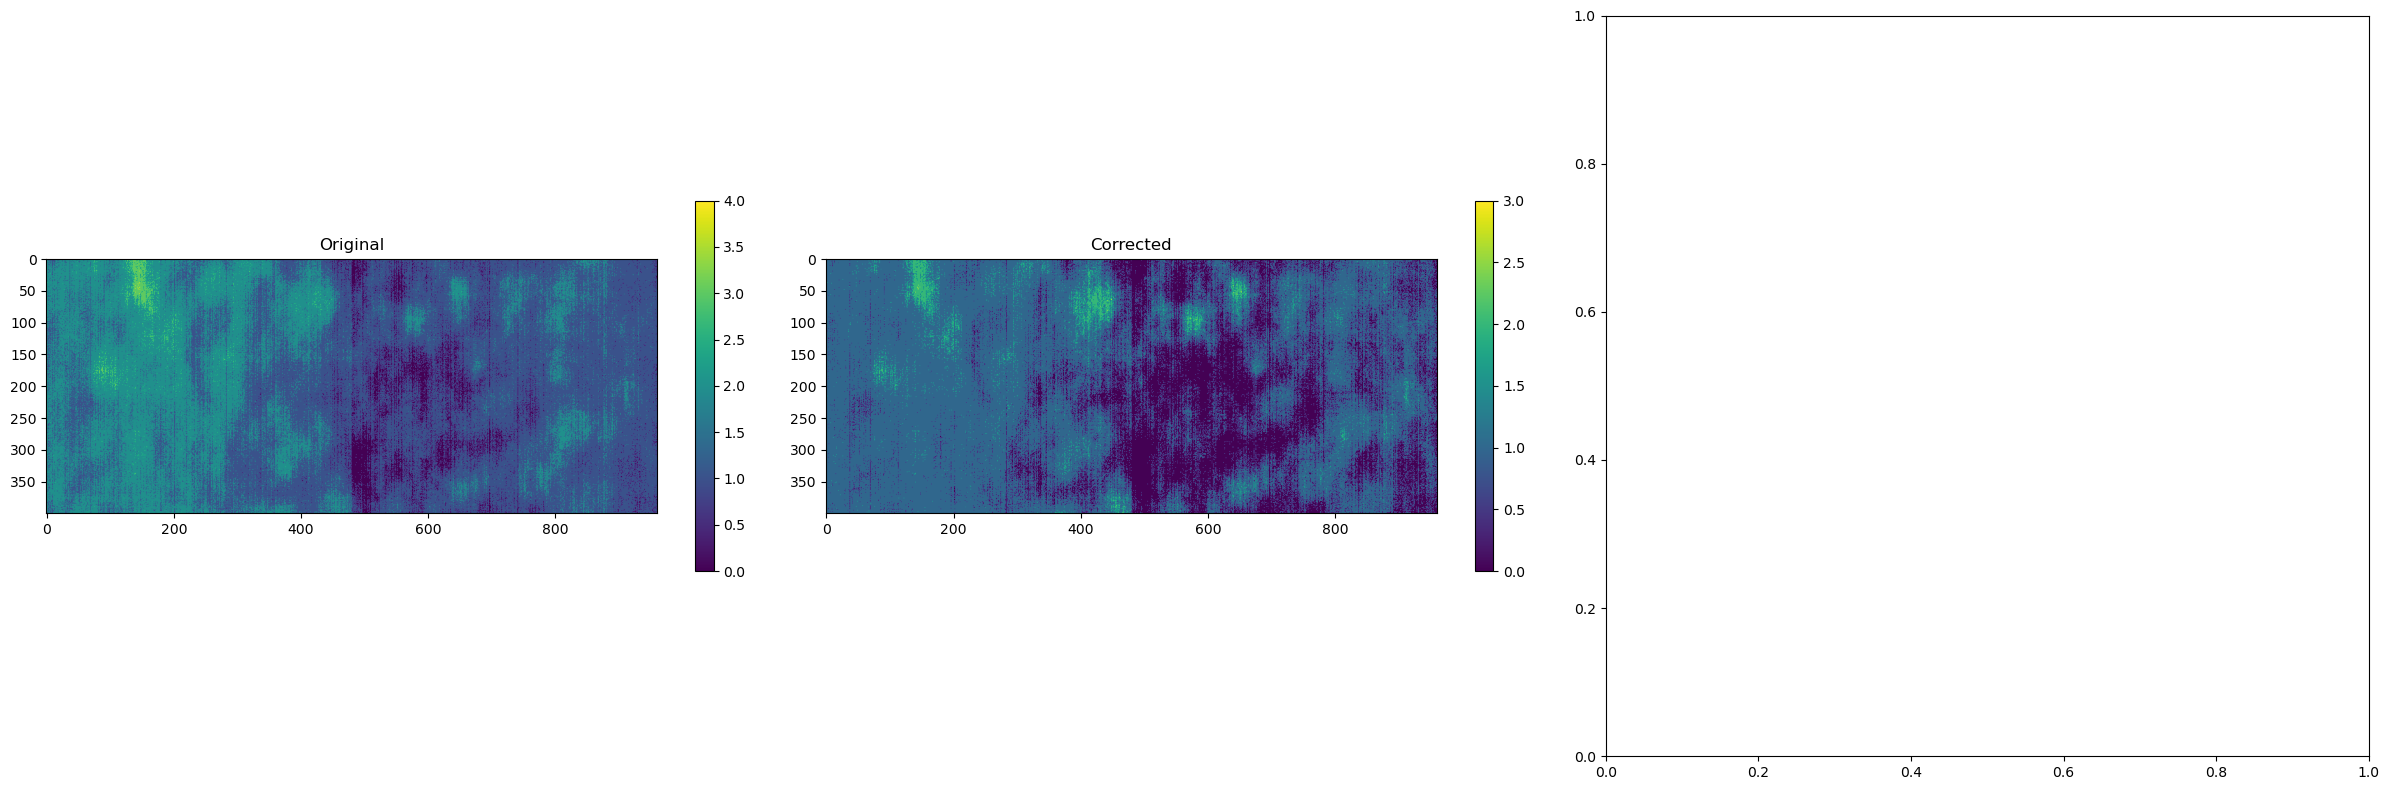

In [46]:

vmin = np.percentile(images_transformed_s1, 5)
vmax = np.percentile(images_transformed_s1, 99)

fig, axes = plt.subplots(1, 3, figsize=(8*3,8))
im = axes[0].imshow(np.median(images_s1, axis=1)) #, vmin=90, vmax=95)#, vmin=vmin, vmax=vmax)
fig.colorbar(im, ax=axes[0], shrink=0.5)
axes[0].set_title("Original")
im = axes[1].imshow(np.median(images_transformed_s1, axis=1)) # , vmin=90, vmax=95) #, vmin=vmin, vmax=vmax)
fig.colorbar(im, ax=axes[1], shrink=0.5)
axes[1].set_title("Corrected")

# im = axes[2].imshow(np.median(images_transformed-images, axis=1)) # -np.max(images, axis=0))
# fig.colorbar(im, ax=axes[2], shrink=0.5)
# axes[2].set_title("Diff")
fig.tight_layout()

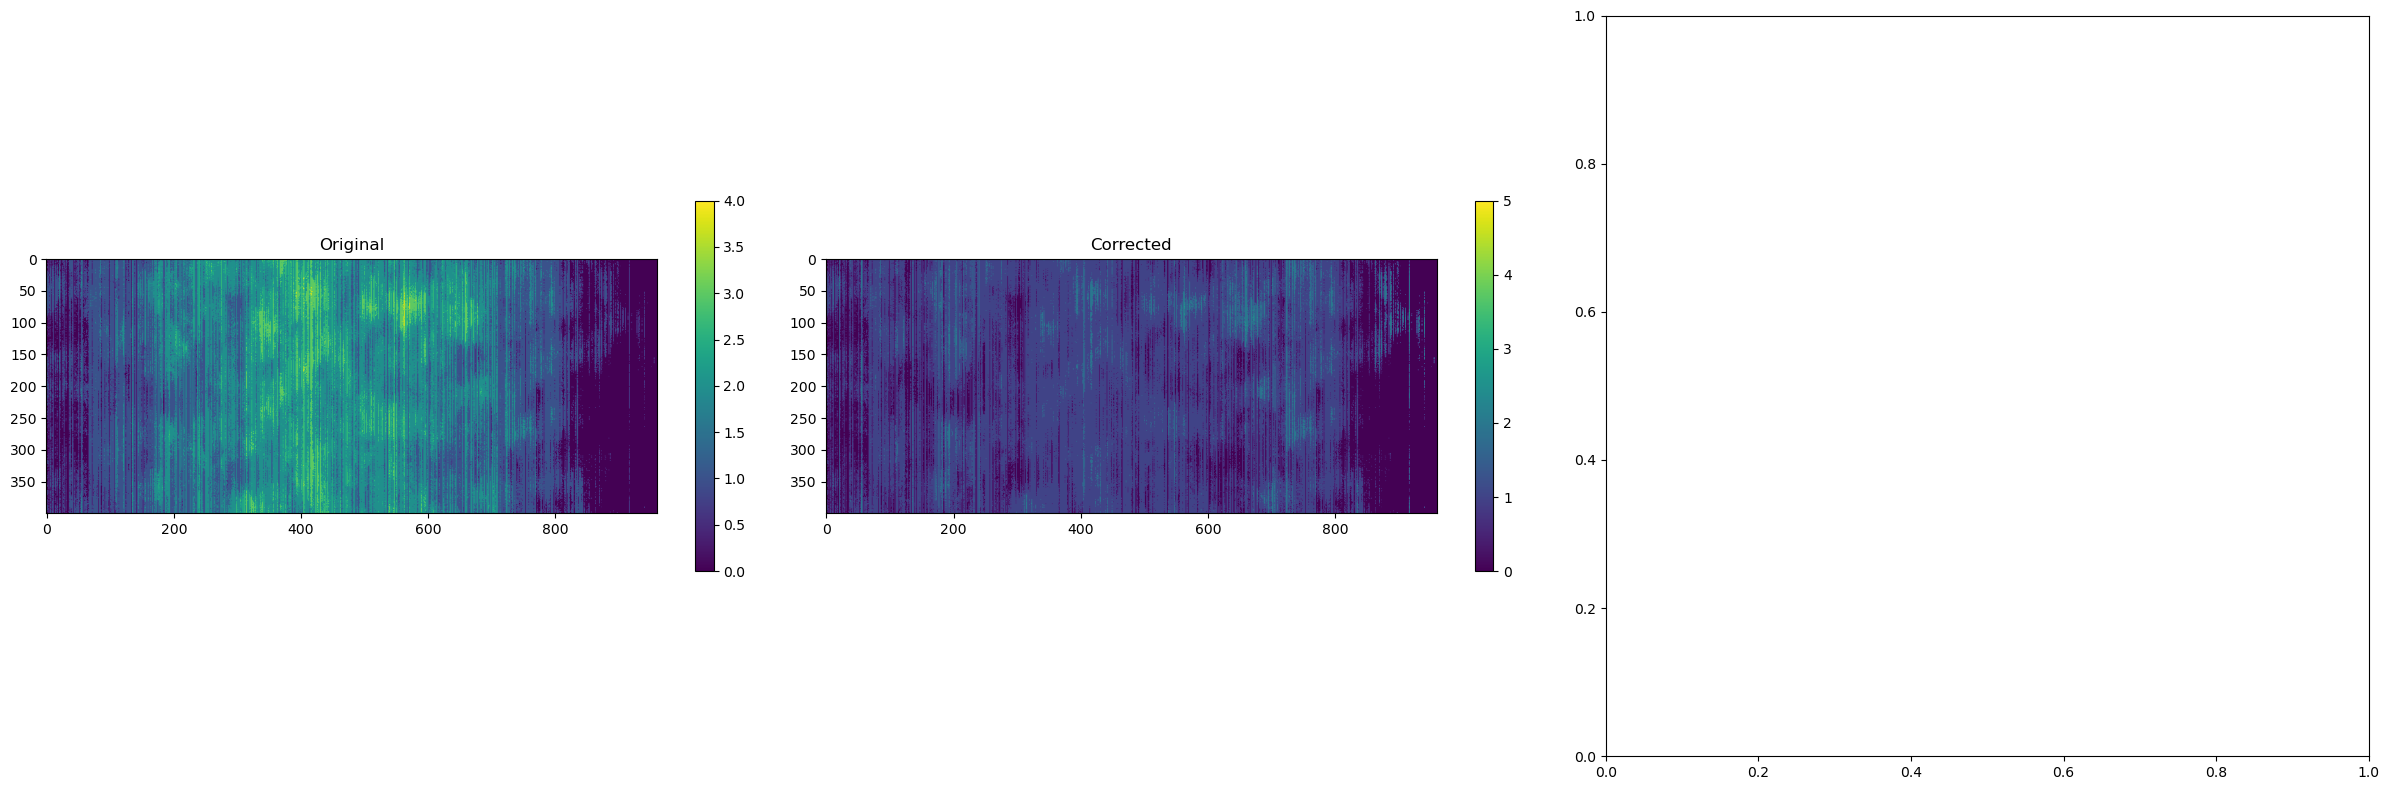

In [47]:
fig, axes = plt.subplots(1, 3, figsize=(8*3,8))
im = axes[0].imshow(np.median(images_s1, axis=2)) #, vmin=90, vmax=95)#, vmin=vmin, vmax=vmax)
fig.colorbar(im, ax=axes[0], shrink=0.5)
axes[0].set_title("Original")
im = axes[1].imshow(np.median(images_transformed_s1, axis=2)) # , vmin=90, vmax=95) #, vmin=vmin, vmax=vmax)
fig.colorbar(im, ax=axes[1], shrink=0.5)
axes[1].set_title("Corrected")

# im = axes[2].imshow(np.median(images_transformed-images, axis=1)) # -np.max(images, axis=0))
# fig.colorbar(im, ax=axes[2], shrink=0.5)
# axes[2].set_title("Diff")
fig.tight_layout()